In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [ ]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

## Prepare the Data

In [ ]:
# Specify data URI
URI = './data/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URI)
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

In [ ]:
train_stats

,count,mean,std,min,25%,50%,75%,max
X1,614.0,0.761531,0.105000,0.62,0.66,0.74,0.82,0.98
X2,614.0,673.829805,87.637629,514.50,612.50,686.00,759.50,808.50
X3,614.0,318.500000,43.764329,245.00,294.00,318.50,343.00,416.50
X4,614.0,177.664902,45.069144,110.25,147.00,220.50,220.50,220.50
X5,614.0,5.210098,1.750971,3.50,3.50,3.50,7.00,7.00
X6,614.0,3.480456,1.120232,2.00,2.00,3.00,4.00,5.00
X7,614.0,0.236482,0.132812,0.00,0.10,0.25,0.40,0.40
X8,614.0,2.861564,1.555516,0.00,2.00,3.00,4.00,5.00


In [ ]:
train

,X1,X2,X3,X4,X5,X6,X7,X8
210,0.69,735.0,294.0,220.5,3.5,4,0.25,5
354,0.71,710.5,269.5,220.5,3.5,4,0.25,5
557,0.90,563.5,318.5,122.5,7.0,3,0.25,2
599,0.66,759.5,318.5,220.5,3.5,4,0.40,2
366,0.74,686.0,245.0,220.5,3.5,5,0.40,3
...,...,...,...,...,...,...,...,...
500,0.69,735.0,294.0,220.5,3.5,5,0.25,1
481,0.90,563.5,318.5,122.5,7.0,5,0.25,4
259,0.69,735.0,294.0,220.5,3.5,5,0.40,5
594,0.64,784.0,343.0,220.5,3.5,3,0.40,5


In [ ]:
norm_train_X

,X1,X2,X3,X4,X5,X6,X7,X8
210,-0.681245,0.697990,-0.559817,0.950431,-0.976657,0.463783,0.101782,1.374744
354,-0.490770,0.418430,-1.119633,0.950431,-0.976657,0.463783,0.101782,1.374744
557,1.318749,-1.258932,0.000000,-1.224006,1.022234,-0.428890,0.101782,-0.553876
599,-0.966959,0.977550,0.000000,0.950431,-0.976657,0.463783,1.231194,-0.553876
366,-0.205056,0.138870,-1.679450,0.950431,-0.976657,1.356455,1.231194,0.088997
...,...,...,...,...,...,...,...,...
500,-0.681245,0.697990,-0.559817,0.950431,-0.976657,1.356455,0.101782,-1.196750
481,1.318749,-1.258932,0.000000,-1.224006,1.022234,1.356455,0.101782,0.731871
259,-0.681245,0.697990,-0.559817,0.950431,-0.976657,1.356455,1.231194,1.374744
594,-1.157434,1.257111,0.559817,0.950431,-0.976657,-0.428890,1.231194,1.374744


## Build the Model

In [ ]:
# input_layer = tf.keras.layers.Input(shape=(len(train.columns)))
# first_dense = tf.keras.layers.Dense(units='128', activation='relu')(input_layer)
# second_dense = tf.keras.layers.Dense(units='128', activation='relu')(first_dense)

# y1_output = tf.keras.layers.Dense(units='1', name='y1_output')(second_dense)
# third_dense = tf.keras.layers.Dense(units='64', activation='relu')(second_dense)
# y2_output = tf.keras.layers.Dense(units='1', name='y2_output')(third_dense)

# model = tf.keras.Model(inputs=input_layer, outputs=[y1_output, y2_output])

In [ ]:
input_layer = tf.keras.layers.Input(shape=(len(train.columns)))
first_dense = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)(input_layer)
second_dense = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)(first_dense)

y1_output = tf.keras.layers.Dense(units=1, name='y1_output')(second_dense)
third_dense = tf.keras.layers.Dense(units=64, activation=tf.nn.relu)(second_dense)
y2_output = tf.keras.layers.Dense(units=1, name='y2_output')(third_dense)

model = tf.keras.Model(inputs=input_layer, outputs=[y1_output, y2_output])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output':'mse', 'y2_output':'mse'},
              metrics={'y1_output':tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output':tf.keras.metrics.RootMeanSquaredError()})

In [ ]:
history = model.fit(x=norm_train_X, y=train_Y, batch_size=10, epochs=500, validation_data=(norm_test_X, test_Y))

In [ ]:
# # Specify the optimizer, and compile the model with loss functions for both outputs
# optimizer = tf.keras.optimizers.SGD(lr=0.001)
# model.compile(optimizer=optimizer,
#               loss={'y1_output': 'mse', 'y2_output': 'mse'},
#               metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
#                        'y2_output': tf.keras.metrics.RootMeanSquaredError()})

In [ ]:
# # Train the model for 500 epochs
# history = model.fit(norm_train_X, train_Y,
#                     epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

In [ ]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 3ms/step - loss: 0.7687 - y1_output_loss: 0.1352 - y2_output_loss: 0.6335 - y1_output_root_mean_squared_error: 0.3677 - y2_output_root_mean_squared_error: 0.7959
Loss = 0.7686912417411804, Y1_loss = 0.13518400490283966, Y1_mse = 0.3676737844944, Y2_loss = 0.633507251739502, Y2_mse = 0.7959316968917847


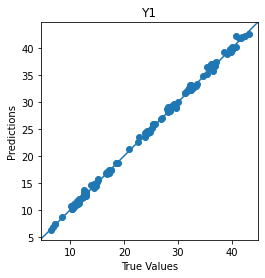

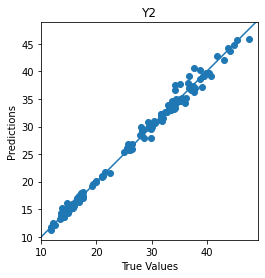

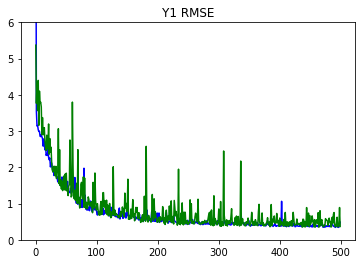

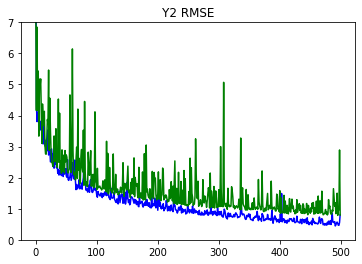

In [ ]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)